# Logistic Regression
<hr style="border:2px solid black">

## 1. Introduction

>- machine learning model used for classification problems
>- uses a linear model: linear combination of coefficients on features
>- converts linear combination into probability, using sigmoid function

### 1.1 `Sigmoid Function`

>$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

In [64]:
import numpy as np
import matplotlib.pyplot as plt

In [65]:
def sigmoid(z):
    sigma = 1/(1+np.exp(-z))
    return sigma

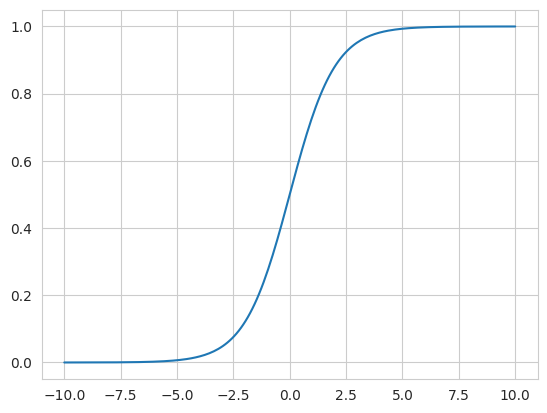

In [66]:
z = np.linspace(-10, 10, 200)
plt.plot(z, sigmoid(z));

- **consider $z$ as a linear function**

$$
z = w_0 + w_1 x
$$

- **let us plot the following function**

$$
\sigma(z) = \sigma(w_0 + w_1 x) = \frac{1}{1+e^{-(w_0 + w_1 x)}}
$$

In [67]:
x = np.linspace(-10, 10, 201)
w1_list = [0.5, 1., 5.]
w0_list = [-5., 0., 5.]

In [68]:
type(x)

numpy.ndarray

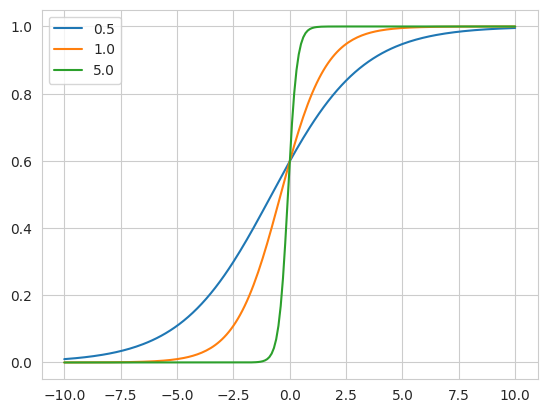

In [69]:
for w1 in w1_list:
    plt.plot(x, sigmoid(w1*x+0.4), label=w1)
    plt.legend()

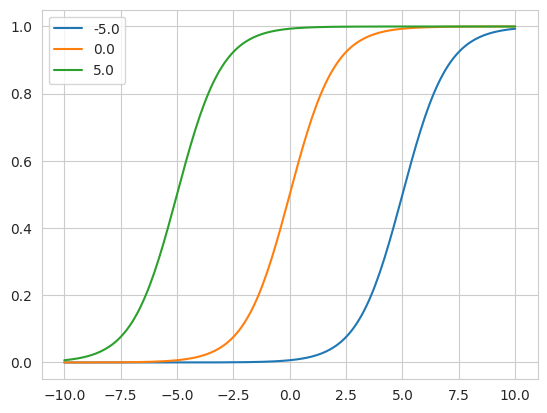

In [70]:
for w0 in w0_list:
    plt.plot(x, sigmoid(w0+1*x), label=w0)
    plt.legend()

### 1.2 Logistic Regression Model

>$$ 
\hat{p}(y=1|X) = \frac{1}{1+e^{-(w_0+w_1 x_1+w_2 x_2+\cdots)}} 
$$

- $X$ are the features
- $y$ is target variable with binary values 0 and 1
- $w_0$ is bias or intercept, $w_1, w_2, \cdots$ are coefficients
- our model learns the bias and coefficients

**log of small and large numbers**

In [71]:
-np.log(0.0001)

9.210340371976182

In [72]:
-np.log(1-0.999)

6.907755278982136

### 1.4 Pros & Cons of Logistic Regression

**Pros:**
- outputs probabilities
- interpretable — coefficients tell you which features are important
- fast and easy to implement


**Cons:**
- linear decision boundary

<hr style="border:2px solid black">

## 2. Penguin Species Classification

**Load Packages**

In [73]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# machine learning stack
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

#### 1. Prepare the data

In [74]:
# read file
df = pd.read_csv('../data/penguins_simple.csv', sep=';')

In [75]:
# filter data: take only Adelie and Gentoo
df = df[df['Species'].isin(['Adelie','Gentoo'])]

**check class balance**

In [76]:
df['Species'].value_counts()

Adelie    146
Gentoo    119
Name: Species, dtype: int64

In [77]:
df['Species'].value_counts(normalize=True)

Adelie    0.550943
Gentoo    0.449057
Name: Species, dtype: float64

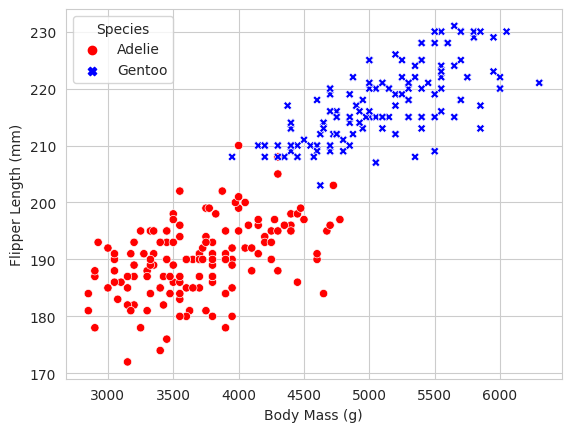

In [78]:
sns.scatterplot(
    x='Body Mass (g)',
    y='Flipper Length (mm)',
    data=df,
    hue='Species',
    style='Species',
    palette=['red','blue']
);

In [79]:
df['Species_Category'] = df['Species'].map({'Adelie':0, 'Gentoo':1})
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Species_Category
0,Adelie,39.1,18.7,181.0,3750.0,MALE,0
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE,0
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE,0
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE,0
4,Adelie,39.3,20.6,190.0,3650.0,MALE,0
...,...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE,1
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE,1
330,Gentoo,50.4,15.7,222.0,5750.0,MALE,1
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE,1


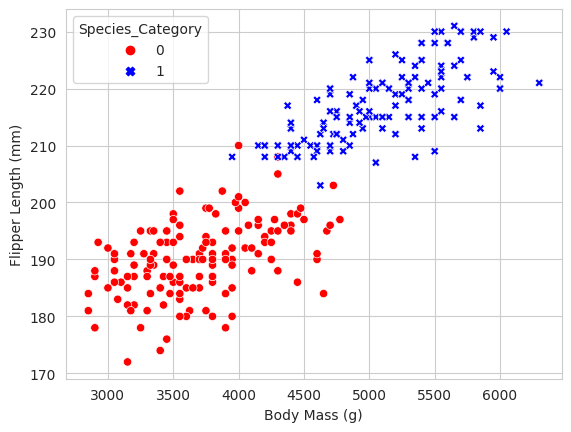

In [80]:
sns.scatterplot(
    x='Body Mass (g)',
    y='Flipper Length (mm)',
    data=df,
    hue='Species_Category',
    style='Species_Category',
    palette=['red','blue']
);

#### 2. Build the model

In [81]:
# features and target
X = df[['Body Mass (g)', 'Flipper Length (mm)']]
y = df['Species_Category']

In [82]:
X.shape, y.shape

((265, 2), (265,))

In [83]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=101,
    stratify=y
)

In [84]:
y_train.value_counts(normalize=True)

0    0.551887
1    0.448113
Name: Species_Category, dtype: float64

In [85]:
y_test.value_counts(normalize=True)

0    0.54717
1    0.45283
Name: Species_Category, dtype: float64

**feature scaling**

In [86]:
from sklearn.preprocessing import StandardScaler

# instantiate standard scaler 
scaler = StandardScaler()

# fit and transform training data
X_train = scaler.fit_transform(X_train)

# transform test data
X_test = scaler.transform(X_test)

In [87]:
X_train

array([[-0.20844761, -0.33901157],
       [ 0.09054355,  0.72573589],
       [-0.50743878, -1.20411889],
       [-0.9260264 , -1.47030575],
       [ 0.80812234,  0.85882932],
       [-0.38784231,  0.52609574],
       [-0.9260264 , -1.07102545],
       [ 0.50913118,  0.85882932],
       [-0.20844761, -0.40555829],
       [ 0.71842499,  0.7922826 ],
       [ 0.3596356 ,  0.06026872],
       [ 0.32973648,  0.52609574],
       [-0.44764054, -1.13757217],
       [ 0.74832411,  0.72573589],
       [-0.62703524, -0.80483859],
       [-1.04562287, -0.80483859],
       [ 0.44933295,  0.92537604],
       [-1.04562287, -0.47210501],
       [-0.74663171, -0.80483859],
       [-0.50743878, -0.80483859],
       [-1.67350431, -0.60519844],
       [ 1.58549937,  1.92357678],
       [ 1.6452976 ,  1.05846947],
       [ 2.06388523,  1.85703007],
       [ 0.3596356 ,  0.65918917],
       [-1.22501757, -0.93793202],
       [-0.9260264 , -1.20411889],
       [ 1.16691174,  1.25810962],
       [-0.44764054,

In [88]:
# instatiate the model
model = LogisticRegression()

In [89]:
# train the model
model.fit(X_train, y_train)

LogisticRegression()

In [90]:
# our coefficients
model.coef_, model.intercept_

(array([[1.91444011, 3.50424139]]), array([-0.62239521]))

#### 3. Evaluate the model

In [91]:
# score on the training data
model.score(X_train, y_train)

0.9858490566037735

In [92]:
# score on the testing data
model.score(X_test, y_test)

0.9811320754716981

#### 4. Predict

In [93]:
from matplotlib.colors import ListedColormap

#removing column names and replacing with int
#X_train= X_train[:].values

#function for plotting the decision boundry
def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 'x', 's', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #removing column names and replacing with int
    Xnew= X[:]

    # plot the decision surface
    x1_min, x1_max = Xnew[:, 0].min() - 1, Xnew[:, 0].max() + 1
    x2_min, x2_max = Xnew[:, 1].min() - 1, Xnew[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=Xnew[y == cl, 0], y=Xnew[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

    # highlight test samples
    if test_idx:
        # plot all samples
        if not versiontuple(np.__version__) >= versiontuple('1.9.0'):
            X_test, y_test = Xnew[list(test_idx), :], y[list(test_idx)]
            warnings.warn('Please update to NumPy 1.9.0 or newer')
        else:
            X_test, y_test = Xnew[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    alpha=1.0,
                    linewidths=1,
                    marker='o',
                    s=55,
                    label='test set')

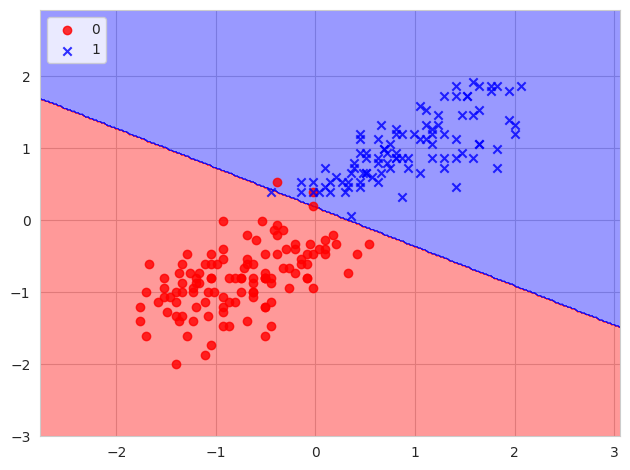

In [94]:
plot_decision_regions(X_train, y_train, classifier=model)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show();